In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import process_data.directions_coordinates as dc
import process_data.duplicate_and_overlap as do
import process_data.sincos as sincos
import process_data.plot_polymer_histgram as my_plot
import functions as func
import process_data.n_n_distance as nn
import json
from tqdm.auto import tqdm

# For on-lattices

## Random

In [5]:
import fnn.four_layers as model
def on_lattices_random(polymer_len, z_dim, generator, num_polymer, total_epochs, saving_step):
    epoch = [i for i in range(saving_step, total_epochs, saving_step)]
    nn_distance = []
    real_directions = np.load(f'../data/random/on_lattices/{polymer_len}/directions.npy')
    real_sin_cos = np.load(f'../data/random/on_lattices/{polymer_len}/sin_cos.npy')
    real_coordinates = np.load(f'../data/random/on_lattices/{polymer_len}/coordinates.npy')
    for i in tqdm(range(saving_step, total_epochs, saving_step)):
        noise = func.get_noise(num_polymer, z_dim)
        check_point = torch.load(f'../experiments/11_11/on_lattices_{polymer_len}/four_layers_gen_{i}.pth.tar')
        generator.load_state_dict(check_point['gen_state_dict'])
        output = generator(noise).data.numpy()
        fake_directions = sincos.sin_cos_to_directions_on_lattices(output)
        coordinates = dc.direction_coordinate_on_lattices(fake_directions)
        nn_distance.append(nn.n_n_distance(coordinates))
    my_plot.check_output_hist(output, 'histogram of output')
    my_plot.check_output_hist(fake_directions, 'histogram of directions')
    plt.plot(epoch, np.array(nn_distance)/np.sqrt(polymer_len - 1 ), label='n to n distance')
    plt.ylim(0.3,1.3)
    plt.legend()
    plt.show()
    # todo:
    # need to check the overlap and mode collapse
    overlap = do.check_overlap(real_directions, fake_directions)
    num_unique = do.check_unique(fake_directions)
    print(f'number of overlap polymers are {overlap}')
    print(f'number of unique polymers are {num_unique}')

### 16 monomers

  0%|          | 0/34 [00:00<?, ?it/s]

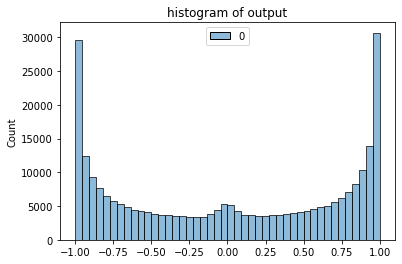

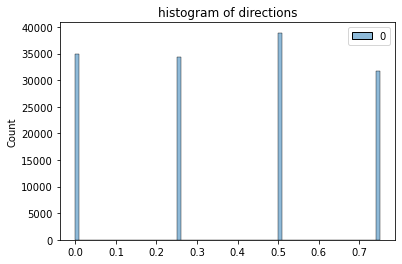

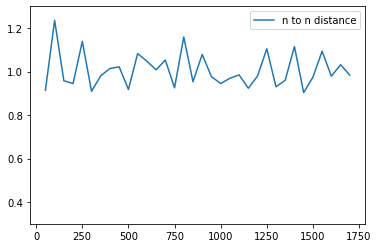

number of overlap polymers are 0
number of unique polymers are 4179


In [3]:
z_dim = 4
polymer_len = 16
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, 1750, 50)

### 32 monomers

  0%|          | 0/28 [00:00<?, ?it/s]

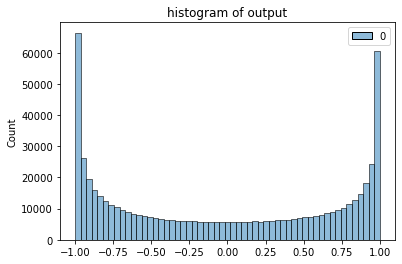

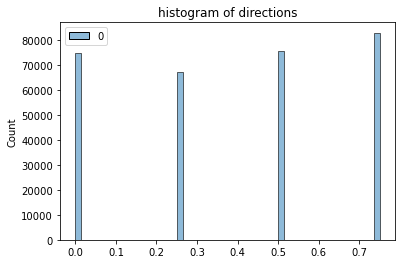

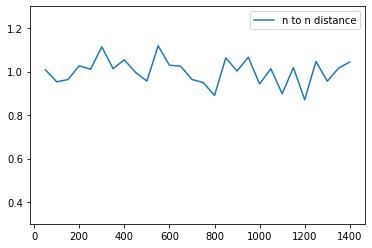

number of overlap polymers are 0
number of unique polymers are 8528


In [4]:
z_dim = 4
polymer_len = 32
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, 1450, 50)

### 64 monomers

In [ ]:
z_dim = 4
polymer_len = 64
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, 1450, 50)

  0%|          | 0/28 [00:00<?, ?it/s]

## self-avoid